In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# constants
k_b = 1.381e-23

In [46]:
# Directory containing CSV files
directory = 'task5_data/'

# List to store DataFrames
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame and append it to the list
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Group the DataFrame by the 'beta' column
grouped_df = combined_df.groupby('beta')

# Create an empty dictionary to store the arrays
beta_arrays = {}

# Iterate over the groups
for beta, group in grouped_df:
    # Store the group as an array in the dictionary
    beta_arrays[beta] = group.to_numpy()


In [56]:
beta_arrays

{0.2: array([[ 0.0000e+00,  2.0000e-01,  1.0000e+00, ...,  1.0000e+00,
          0.0000e+00,  3.0000e+00],
        [ 1.0000e+00,  2.0000e-01,  6.2875e-01, ...,  3.8500e-01,
          0.0000e+00,  3.0000e+00],
        [ 2.0000e+00,  2.0000e-01,  4.0000e-01, ...,  1.4750e-01,
          0.0000e+00,  3.0000e+00],
        ...,
        [ 4.8000e+01,  2.0000e-01, -8.0000e-02, ..., -2.7500e-02,
          0.0000e+00,  8.0000e+00],
        [ 4.9000e+01,  2.0000e-01,  1.8750e-02, ...,  2.5000e-03,
          0.0000e+00,  8.0000e+00],
        [ 5.0000e+01,  2.0000e-01, -2.8750e-02, ..., -3.5000e-02,
          0.0000e+00,  8.0000e+00]]),
 0.3: array([[ 0.0000e+00,  3.0000e-01,  1.0000e+00, ...,  1.0000e+00,
          0.0000e+00,  1.5000e+01],
        [ 1.0000e+00,  3.0000e-01,  8.6125e-01, ...,  7.3750e-01,
          0.0000e+00,  1.5000e+01],
        [ 2.0000e+00,  3.0000e-01,  7.6125e-01, ...,  5.8000e-01,
          0.0000e+00,  1.5000e+01],
        ...,
        [ 4.8000e+01,  3.0000e-01, -1.2500e-

In [54]:
len(beta_arrays[0.2])

r_correlation = []
# G = np.zeros(len(beta_arrays[0.2]))

G = []

for i in range(len(beta_arrays[0.2])):
    
    temp_r_correlation = beta_arrays[0.2][i][6]
    r_correlation.append(temp_r_correlation)
    
    temp_G = beta_arrays[0.2][i][4]
    G.append(temp_G)
    
    
print(r_correlation)
print(G)

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

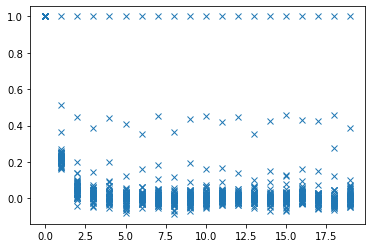

In [58]:
plt.plot(r_correlation, G, marker = "x", linestyle="")